In [93]:
import pandas as pd

df = pd.read_csv('../data/신용카드 연체 예측 모델링 데이터.csv')
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


# 직업

In [94]:
# 직업 결측치 처리
df.loc[df['occyp_type'].isnull(), 'occyp_type'] = df['income_type']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     26457 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

### 직군 별 수입 안정성
* commercial associate (영업사원) : 약간의 기본급에 인센티브 형식
* working (일반 직장인) : 정규직은 안정적, 비정규직은 아님
* state servant (공무원) : 매우 안정적, 경기 불황에 영향 받지 않음, 추후 연금
* pensioner (연금 수령자) : 매우 안정적, 이전의 소득과 제도에 따라 변동 가능
* student (학생) : 안정적인 수입을 기대하기 어려움

In [95]:
# 직업 종류
df['occyp_type'].unique()

array(['Commercial associate', 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Pensioner', 'Working', 'Realty agents',
       'State servant', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff', 'Student'], dtype=object)

In [96]:
# 직업 별 평균연봉
mean_income = df.groupby('occyp_type')['income_total'].mean()
mean_income.describe()

count        23.000000
mean     184547.136762
std       34286.094676
min      135000.000000
25%      161769.537745
50%      180790.129542
75%      197394.625113
max      278735.249654
Name: income_total, dtype: float64

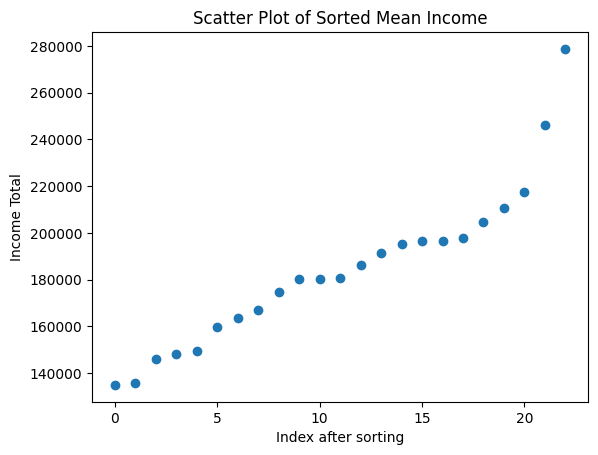

In [97]:
import matplotlib.pyplot as plt

sorted_income = mean_income.sort_values()

idx = list(range(len(sorted_income)))

plt.scatter(idx, sorted_income)
plt.xlabel('Index after sorting')
plt.ylabel('Income Total')
plt.title('Scatter Plot of Sorted Mean Income')
plt.show()

In [98]:
stab_one = ['State servant', 'Pensioner', 'Managers', 'High skill tech staff', 'Core staff', 
           'Medicine staff', 'Accountants', 'HR staff', 'IT staff']
stab_two = ['Sales staff', 'Drivers', 'Realty agents', 'Security staff', 'Private service staff',
           'Cooking staff', 'Secretaries', 'Commercial associate', 'Working']
stab_three = ['Laborers', 'Student', 'Cleaning staff', 'Low-skill Laborers', 'Waiters/barmen staff']

In [99]:
def income_stability(occyp):
    if occyp in(stab_one):
        return 1
    elif occyp in(stab_two):
        return 2
    elif occyp in(stab_three):
        return 3

In [100]:
df['income_stability'] = [ income_stability(stab) for stab in df['occyp_type'] ]

In [101]:
df['age'] = [ int(-days / 365) for days in df['DAYS_BIRTH'] ]

In [102]:
df['emp_years'] = [ int(-days / 365) for days in df['DAYS_EMPLOYED'] ]

In [103]:
df['income_per_capita'] = df.apply(lambda row : row['income_total'] / row['family_size'], axis=1)

In [104]:
df['hold_period'] = df.apply(lambda row : - row['begin_month'], axis=1)

In [105]:
def hasAsset(c):
    if c == 'Y':
        return 1
    else:
        return 0

In [106]:
df['car'] = df['car'].apply(lambda x : hasAsset(x))
df['reality'] = df['reality'].apply(lambda x : hasAsset(x))

In [107]:
df['asset'] = df.apply(lambda row : row['car'] + row['reality'], axis=1)

In [108]:
df['age_group'] = [ (age // 10) * 10 for age in df['age'] ]

In [109]:
df.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit',
       'income_stability', 'age', 'emp_years', 'income_per_capita',
       'hold_period', 'asset', 'age_group'],
      dtype='object')

In [110]:
df_filtered = df[['gender', 'age_group','child_num', 'income_total','asset',
       'edu_type',  'house_type',
       'occyp_type', 'income_stability', 'email', 'work_phone',
         'family_type','family_size', 
        'emp_years', 'income_per_capita',
       'hold_period',   'credit']]
df_filtered.head()

,gender,age_group,child_num,income_total,asset,edu_type,house_type,occyp_type,income_stability,email,work_phone,family_type,family_size,emp_years,income_per_capita,hold_period,credit
0,F,30,0,202500.0,0,Higher education,Municipal apartment,Commercial associate,2,0,0,Married,2.0,12,101250.0,6.0,1.0
1,F,30,1,247500.0,1,Secondary / secondary special,House / apartment,Laborers,3,1,0,Civil marriage,3.0,4,82500.0,5.0,1.0
2,M,50,0,450000.0,2,Higher education,House / apartment,Managers,1,0,0,Married,2.0,12,225000.0,22.0,2.0
3,F,40,0,202500.0,1,Secondary / secondary special,House / apartment,Sales staff,2,0,0,Married,2.0,5,101250.0,37.0,0.0
4,F,40,0,157500.0,2,Higher education,House / apartment,Managers,1,0,0,Married,2.0,5,78750.0,26.0,2.0


In [111]:
df_filtered.to_csv('../data/derived_variables.csv')